In [1]:
# Feature Engineering using Titanic dataset

In [70]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.impute import SimpleImputer
from sklearn.preprocessing import LabelEncoder,OneHotEncoder

In [3]:
df = pd.read_csv('titanic.csv')

In [4]:
df.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,ParCh,Ticket,Fare,Cabin,Embarked
0,1,0.0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1.0,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1.0,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1.0,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0.0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


In [5]:
df.shape

(950, 12)

In [6]:
df.columns

Index(['PassengerId', 'Survived', 'Pclass', 'Name', 'Sex', 'Age', 'SibSp',
       'ParCh', 'Ticket', 'Fare', 'Cabin', 'Embarked'],
      dtype='object')

In [7]:
null_row = df[df['Sex'].isnull()]
null_row

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,ParCh,Ticket,Fare,Cabin,Embarked
920,921,3.0,"Samaan, Mr. Elias",male,NaN,2.0,0,2662,21.6792,NaN,C,NaN


In [8]:
df.drop(index=920, inplace=True)

In [53]:
df.isnull().sum()

PassengerId    0
Survived       0
Pclass         0
Name           0
Sex            0
Age            0
SibSp          0
ParCh          0
Ticket         0
Fare           0
Cabin          0
Embarked       0
EncodedName    0
dtype: int64

In [10]:
df['Embarked'].unique()

array(['S', 'C', 'Q', nan], dtype=object)

In [11]:
df[df['Embarked']== 'E101'] 

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,ParCh,Ticket,Fare,Cabin,Embarked


In [12]:
df.drop(index=123, inplace=True)

In [13]:
imputer1 = SimpleImputer(strategy='most_frequent')
imputer2 = SimpleImputer(strategy='mean')

In [14]:
df['Embarked'] = imputer1.fit_transform(df[['Embarked']]).flatten()
df['Survived'] = imputer1.fit_transform(df[['Survived']]).flatten()
df['Fare'] = imputer1.fit_transform(df[['Fare']]).flatten()

In [15]:
df['Cabin'].value_counts()

Cabin
C23 C25 C27    5
G6             4
B96 B98        4
F2             3
C78            3
              ..
C              1
A21            1
D34            1
A9             1
C31            1
Name: count, Length: 154, dtype: int64

In [16]:
df['Cabin'].unique()

array([nan, 'C85', 'C123', 'E46', 'G6', 'C103', 'D56', 'A6',
       'C23 C25 C27', 'B78', 'D33', 'B30', 'C52', 'B28', 'C83', 'F33',
       'F G73', 'E31', 'A5', 'D10 D12', 'D26', 'C110', 'B58 B60', 'F E69',
       'D47', 'B86', 'F2', 'C2', 'E33', 'B19', 'A7', 'C49', 'F4', 'A32',
       'B4', 'B80', 'A31', 'D36', 'D15', 'C93', 'C78', 'D35', 'C87',
       'B77', 'E67', 'B94', 'C125', 'C99', 'C118', 'D7', 'A19', 'B49',
       'D', 'C22 C26', 'C106', 'E101', 'C65', 'E36', 'C54',
       'B57 B59 B63 B66', 'C7', 'E34', 'C32', 'B18', 'C124', 'C91', 'E40',
       'T', 'C128', 'D37', 'B35', 'E50', 'C82', 'B96 B98', 'E10', 'E44',
       'A34', 'C104', 'C111', 'C92', 'E38', 'D21', 'E12', 'E63', 'A14',
       'B37', 'C30', 'D20', 'B79', 'E25', 'D46', 'B73', 'C95', 'B38',
       'B39', 'B22', 'C86', 'C70', 'A16', 'C101', 'C68', 'A10', 'E68',
       'B41', 'A20', 'D19', 'D50', 'D9', 'A23', 'B50', 'A26', 'D48',
       'E58', 'C126', 'B71', 'B51 B53 B55', 'D49', 'B5', 'B20', 'F G63',
       'C62 C64',

In [60]:
# fill Cabin based on Pclass

# df['Cabin'] = df.groupby(['Pclass', 'Fare'])['Cabin'].transform(lambda x: x.fillna(method='ffill').fillna(method='bfill'))

class_group = df.groupby(['Pclass','Fare'])
df['Cabin'] = class_group['Cabin'].transform(lambda x: x.fillna(x.mode()[0] if not x.mode().empty else np.nan))

In [61]:
# fill Age based on Pclass

df['Age'] = class_group['Age'].transform(lambda x: x.fillna(x.median()))

In [ ]:
# Now Encoding

In [62]:
df.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,ParCh,Ticket,Fare,Cabin,Embarked,EncodedName,Sex_female,Sex_male,Embarked_Q,Embarked_S
0,1.0,0.0,3,"Braund, Mr. Owen Harris",male,22.0,1.0,0.0,A/5 21171,7.2500,G6,S,113.0,0.0,1.0,0.0,1.0
1,2.0,1.0,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1.0,0.0,PC 17599,71.2833,C85,C,203.0,1.0,0.0,0.0,0.0
2,3.0,1.0,3,"Heikkinen, Miss. Laina",female,26.0,0.0,0.0,STON/O2. 3101282,7.9250,G6,S,373.0,1.0,0.0,0.0,1.0
3,4.0,1.0,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1.0,0.0,113803,53.1000,C123,S,291.0,1.0,0.0,0.0,1.0
4,5.0,0.0,3,"Allen, Mr. William Henry",male,35.0,0.0,0.0,373450,8.0500,G6,S,17.0,0.0,1.0,0.0,1.0


In [63]:
le = LabelEncoder()
df['EncodedName'] = le.fit_transform(df['Name'])

In [64]:
df.shape

(950, 17)

In [65]:
ohe = OneHotEncoder(sparse_output=False, drop='first')
one_hot_encoded = ohe.fit_transform(df[['Sex','Embarked']])

encoded_df = pd.DataFrame(one_hot_encoded, columns=ohe.get_feature_names_out(['Sex','Embarked']))

df = pd.concat([df,encoded_df], axis=1)

In [66]:
df.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,ParCh,Ticket,Fare,...,Sex_female,Sex_male,Embarked_Q,Embarked_S,Sex_female,Sex_male,Sex_nan,Embarked_Q,Embarked_S,Embarked_nan
0,1.0,0.0,3,"Braund, Mr. Owen Harris",male,22.0,1.0,0.0,A/5 21171,7.2500,...,0.0,1.0,0.0,1.0,0.0,1.0,0.0,0.0,1.0,0.0
1,2.0,1.0,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1.0,0.0,PC 17599,71.2833,...,1.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0
2,3.0,1.0,3,"Heikkinen, Miss. Laina",female,26.0,0.0,0.0,STON/O2. 3101282,7.9250,...,1.0,0.0,0.0,1.0,1.0,0.0,0.0,0.0,1.0,0.0
3,4.0,1.0,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1.0,0.0,113803,53.1000,...,1.0,0.0,0.0,1.0,1.0,0.0,0.0,0.0,1.0,0.0
4,5.0,0.0,3,"Allen, Mr. William Henry",male,35.0,0.0,0.0,373450,8.0500,...,0.0,1.0,0.0,1.0,0.0,1.0,0.0,0.0,1.0,0.0


In [67]:
df.isnull().sum()

PassengerId     2
Survived        2
Pclass          2
Name            2
Sex             2
Age             2
SibSp           2
ParCh           2
Ticket          2
Fare            2
Cabin           2
Embarked        2
EncodedName     0
Sex_female      2
Sex_male        2
Embarked_Q      2
Embarked_S      2
Sex_female      0
Sex_male        0
Sex_nan         0
Embarked_Q      0
Embarked_S      0
Embarked_nan    0
dtype: int64

In [74]:
correlation_df = df[['Survived','Age','Fare']]
correlation_matrix = correlation_df.corr()

correlation_matrix

,Survived,Age,Fare
Survived,1.000000,-0.063230,0.226321
Age,-0.063230,1.000000,0.124847
Fare,0.226321,0.124847,1.000000


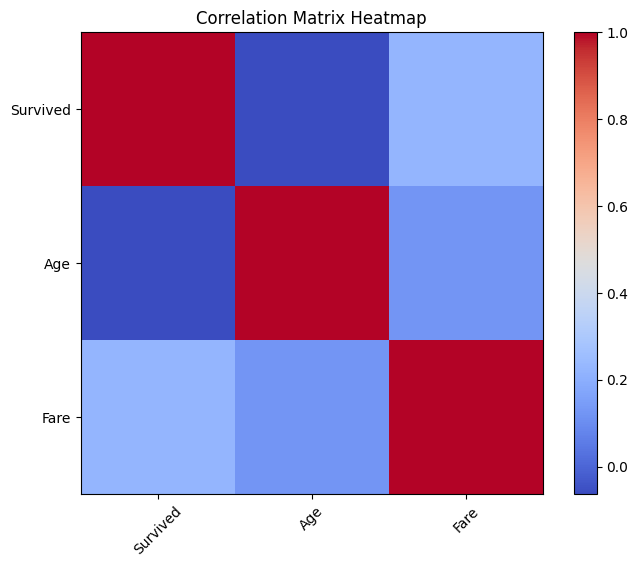

In [77]:
# HeatMap for the correlation

fig, ax = plt.subplots(figsize=(8,6))
cax = ax.imshow(correlation_matrix, cmap='coolwarm', interpolation='nearest')
fig.colorbar(cax)

ax.set_xticks(np.arange(len(correlation_matrix.columns)))
ax.set_yticks(np.arange(len(correlation_matrix.columns)))

ax.set_xticklabels(correlation_matrix.columns)
ax.set_yticklabels(correlation_matrix.columns)

plt.xticks(rotation=45)
plt.title('Correlation Matrix Heatmap')

plt.show()